In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [4]:
# Load dataset
import io
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
X = df.drop("target", axis=1)
y = df["target"]


Saving heart.csv to heart (1).csv


In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Decision Tree Accuracy: 0.99


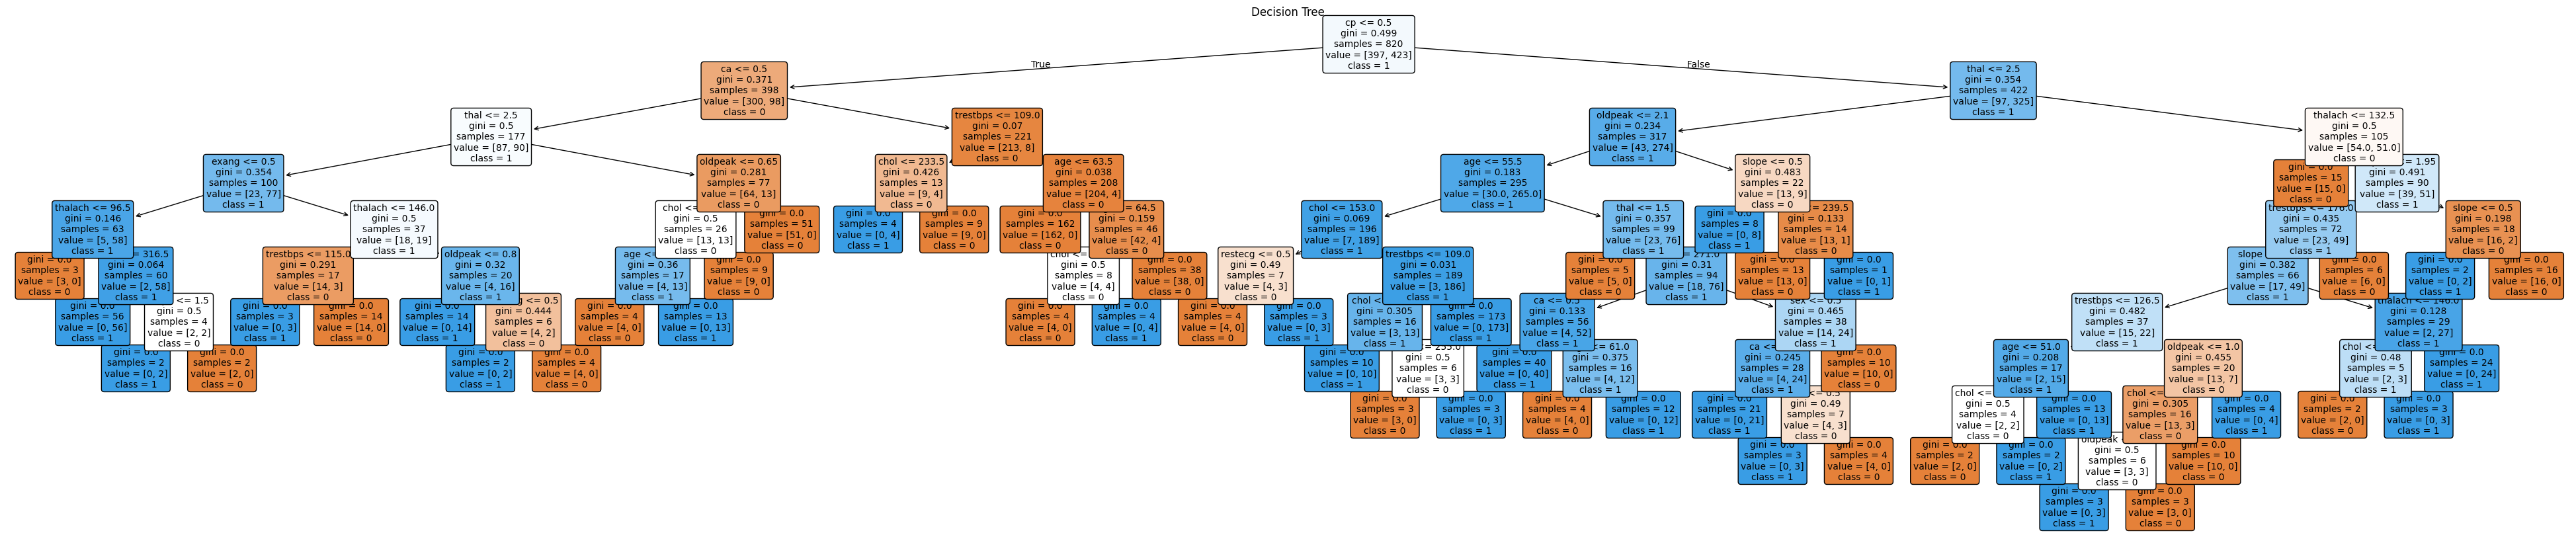

In [26]:
# Visualize the Decision Tree
plt.figure(figsize=(50, 10))
plot_tree(dtree, feature_names=X.columns, class_names=["0", "1"], filled=True,rounded=True,fontsize=10)
plt.title("Decision Tree")
plt.show()

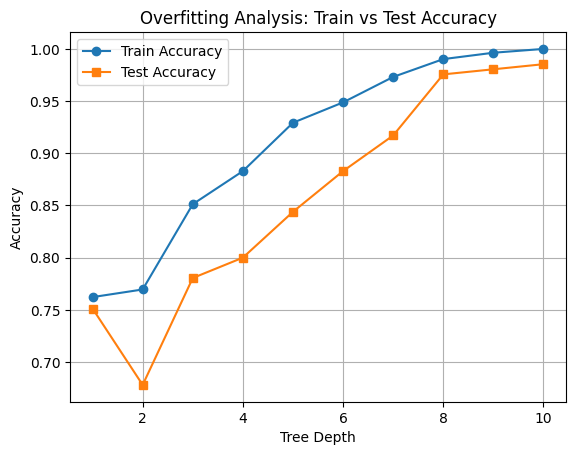

In [27]:
# Analyze overfitting by varying max_depth
train_scores = []
test_scores = []
depth_range = range(1, 11)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depth_range, train_scores, label="Train Accuracy", marker='o')
plt.plot(depth_range, test_scores, label="Test Accuracy", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis: Train vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.2f}")

Random Forest Accuracy: 0.99


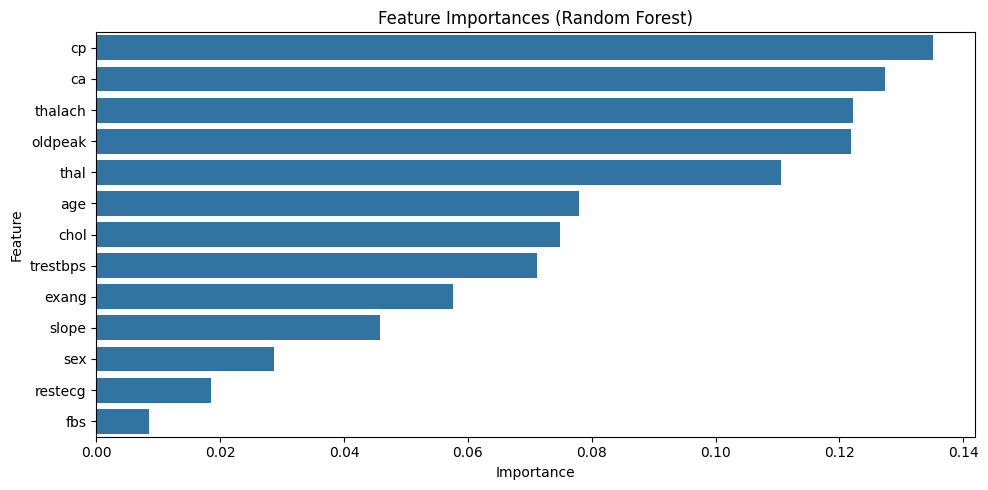

In [29]:
# Feature importances from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [30]:
# Cross-validation
dtree_cv = cross_val_score(dtree, X, y, cv=5)
rf_cv = cross_val_score(rf, X, y, cv=5)

print(f"Decision Tree CV Accuracy: {dtree_cv.mean():.2f}")
print(f"Random Forest CV Accuracy: {rf_cv.mean():.2f}")

Decision Tree CV Accuracy: 1.00
Random Forest CV Accuracy: 1.00
